## Assignment - 1 Sensing Communications and Networking for Smart Wireless Devices 

Question 1 (30 points) 

<br>
1. A = 
1 0
0 1
    What is 𝐶 (𝐴) ?

Answer:- The column Space of the A i.e. C(A) = R2, since both the column vectors are independent to each other. \
<br>
2. B =
1 2
2 4
    What is 𝐶 (𝐵) ?

Answer:- The column Space of the B i.e. C(B) = R1, since we can obtain the column vector 2 as C2 = C1 * 2 or C2 is linearly               dependent on C1.
<br>  
3. 𝐷 =
1 2 3
0 0 4
    What is 𝐶 (𝐷) ?

Answer:- The column Space of the D i.e. C(D) = R2, since we can obtain the column vector 2 as C2 = C1 * 2 and the number of                linearly independent vectors are 2.


Question 2 (50 points) \
<br>
2) Write a program (in any convenient language, like Python/Matlab) that emulates
an user localization using GPS. Use the following steps for doing this emulation.
Also submit a report with relevant results and explainations.

(a) Fix the user at (100,100,100). Put 5 satellites at any random locations (you can
manually put their locations), and fix their positions. Now calculate the time it
takes for a signal to arrive from each one of these satellites to the user.

In [11]:
import numpy as np

from math import sqrt

user_loc = [100,100,100]

satellites=[[860000,720000,590000],[210000,140000,790000],[-560000,210000,540000],[960000,390000,-760000],[-616600,666000,-673000]]

time = []

speed = 3*10**8 
 
for  j in satellites:
    
    temp = sqrt((j[0]-user_loc[0])**2 + (j[1]-user_loc[1])**2 + (j[2]-user_loc[2])**2)
    time.append(temp/speed)
for j in time:
    print(j)  

0.0042238292658045105
0.0027639987739183644
0.002685893250960573
0.004283277600156217
0.003766527003310432


(b) Now lets do the opposite operation, i.e. use the satellite locations and the
times to find out the location of the user. Check whether it is coming exactly
as (100,100,100).


In [12]:
distance = []

for i in time:
    distance.append(i*speed)
    

P = [ [0 for y in range(4)] for x in range(4)]
Q = [ [0 for y in range(1)] for x in range(4)]

for i in range(4):
    for j in range(3):
        P[i][j] = 2*(satellites[i+1][j] -satellites[i][j])
        P[i][3]=2*(distance[i]-distance[i+1])

        
for i in range(4):
    Q[i][0]=distance[i]**2 - distance[i+1]**2
    for j in range(3):
        Q[i][0] +=  (satellites[i+1][j]**2 - satellites[i][j]**2 )

Y = np.dot(np.linalg.inv(np.array(P)),Q)

print (Y[:3])

[[100.]
 [100.]
 [100.]]


(c) Now add some random errors with the times (you can use function likes
“rand” in matlab). Check how much location inaccuracy it showing up.

In [17]:
import random
dist=[]

for i in time:
    dist.append((i+ random.uniform(0.000000001,0.000000009))*speed)

a = [ [0 for y in range(4)] for x in range(4)]
b = [ [0 for y in range(1)] for x in range(4)]

for i in range(4):
    for j in range(3):
        a[i][j] = 2*(satellites[i+1][j] -satellites[i][j])
        a[i][3]=2*(dist[i]-dist[i+1])
for i in range(4):
    b[i][0]=dist[i]**2 - dist[i+1]**2
    for j in range(3):
        b[i][0] +=  (satellites[i+1][j]**2 - satellites[i][j]**2 )    
Z = np.dot(np.linalg.inv(np.array(a)),b)

error = sqrt((Z[0]-x[0])**2+(Z[1]-x[1])**2+(Z[2]-Z[2])**2)
print(error)

0.9596143919401493


(d) Now increase the amount of the random errors with time, and check what is
the effect of this change on the localization error. You can plot a graph on the
amount of timing errors vs localization error to see the effect. You need to run
the program multiple time and then can take the average localization errors).

In [24]:
import matplotlib.pyplot as plt
errorlist=[]

for outer in range(10):
    error = []
    for kk in range(30 ):
        t2 = []
        for i in range(len(time)):
            z = random.uniform(0.00000001,0.00000009)
            t2.append(time[i]+ 2*outer*z)
        for i in range(len(dist)):
            dist[i] = t2[i]*speed
        for i in range(4):
            a[i][3]=2*(dist[i]-dist[i+1])
        for i in range(4):
            b[i][0]=dist[i]**2 - dist[i+1]**2
            for j in range(3):
                b[i][0] +=  (satellites[i+1][j]**2 - satellites[i][j]**2 )    
        x = np.matmul(np.linalg.inv(np.array(a)),b)
        error.append(sqrt((Z[0]-x[0])**2+(Z[1]-x[1])**2+(Z[2]-x[2])**2))
    sum=0
    for i in range(30): 
        sum+=error[i]
    errorlist.append(sum/30)

    

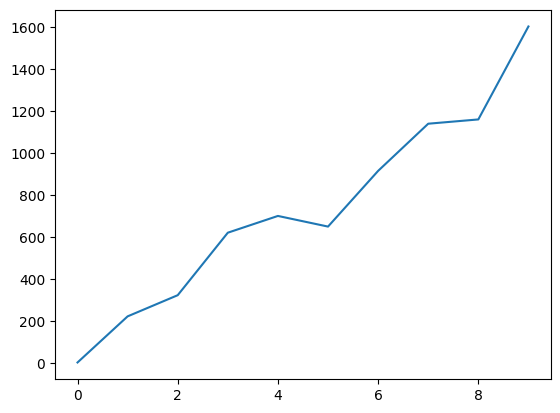

In [25]:
plt.plot(errorlist)
plt.show()
    